# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Цель исследования
1. Определить рыночную стоимость объектов недвижимости;
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность;
3. Установить, какие факторы влияют на ценообразование стоимости квартир.

# Ход исследования
Данные о недвижимости мы получим из файла '/datasets/real_estate_data.csv'. О качестве данных ничего не известно, поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.<br>
Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы будем искать возможность исправить все ошибки в данных, которые не приведут к искажению конечного результата. Далее, создадим необходимые столбцы, и приступим к проведению исследовательского анализа.<br>

Таким образом, исследование пройдёт в восемь этапов:<br>
• Обзор данных<br>
• Предобработка данных<br>
• Расчеты и добавление результатов в таблицу<br>
• Проведение анализа для Ленинградской области<br>
• Проведение анализа для Санкт-Петербурга<br>
• Проверить, различаются ли факторы, которые влияют на ценообразование стоимости квартир<br>
• Написание промежуточных выводов<br>
• Написание общего вывода<br>

### Откройте файл с данными и изучите общую информацию. 

In [2]:
#Импортируем необходимые библиотеки в отдельной ячейке
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#"Читаем" датафрейм и разделяем данные по колонкам
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#Изучаем информацию о самом датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#Выводим первые 25 строк для изучения данных в таблице
data.head(25)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


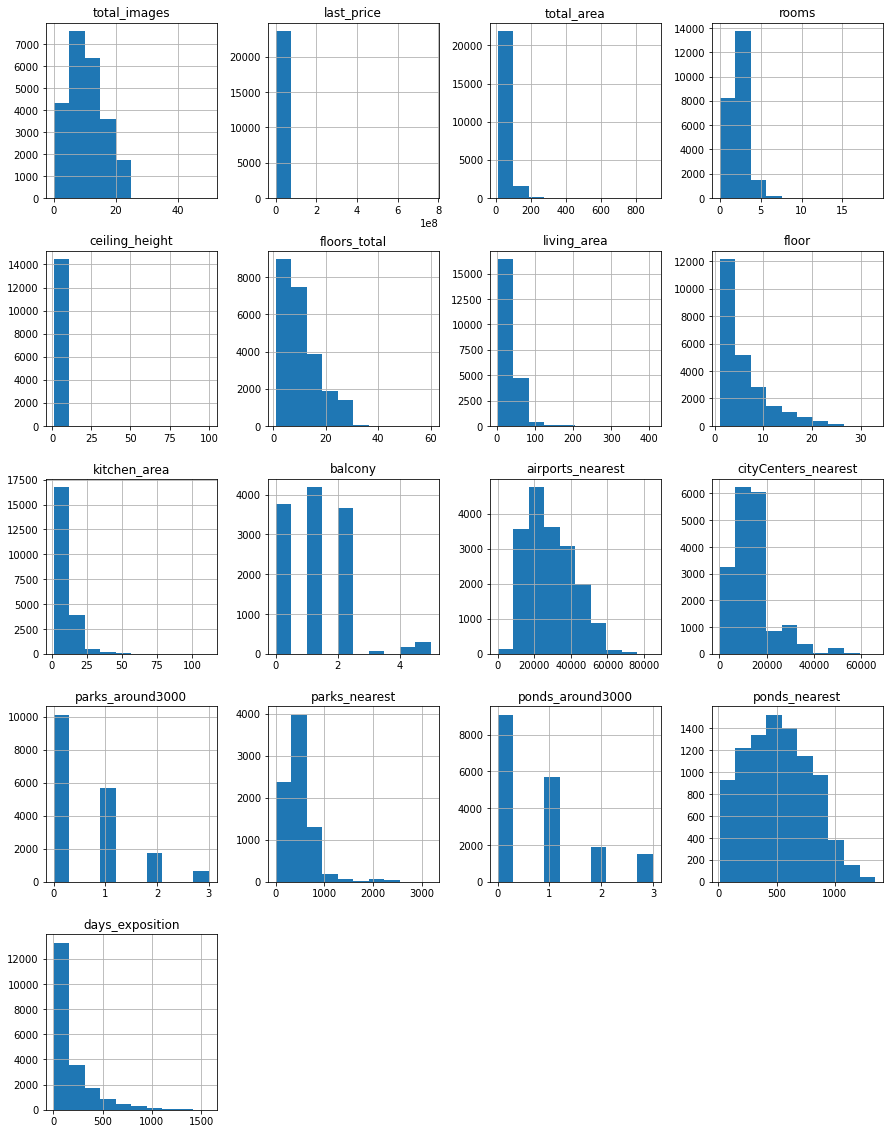

In [5]:
#Строим гистограммы для всех числовых столбцов таблицы 
data.hist(figsize=(15,20));

#### Вывод
Мы ознакомились с представленным датафреймом. 
Всего в датафрейме 23699 записи. Во многих столбцах есть пропущенные значения, которые необходимо обработать. Имеется некорректный тип данных у ряда значений. 

### Предобработка данных

In [6]:
#Находим количество пропущенных значений в столбцах и изучаем их
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
#Проверяем колличество пропусков в %
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [8]:
#Перезаписываем и заменяем пропущенные значения на 0 в столбце "число балконов"
data['balcony'] = data['balcony'].fillna(value=0)
#Перезаписываем и заменяем пропущенные значения на 0 в столбце "число парков в радиусе 3 км"
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
#Перезаписываем и заменяем пропущенные значения на 0 в столбце "число водоемов в радиусе 3 км"
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)
#Находим количество аппартаментов
data['is_apartment'].value_counts()
#Перезаписываем и заменяем пропущенные значение на False в столбце "апартаменты"
data['is_apartment'] = data['is_apartment'].fillna(value=False)

#Проверяем количество пропущенных значений 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Причины, которые могли привести к пропускам в данных:
Были выявлены пропущенные значения в следующих столбцах:<br>
ceiling_height — высота потолков (пропущенных значений 9195)<br>
floors_total — всего этажей в доме (пропущенных значений 86)<br>
living_area — жилая площадь в квадратных метрах (пропущенных значений 1903)<br>
is_apartment — апартаменты (пропущенных значений 20924)<br>
kitchen_area — площадь кухни в квадратных метрах (пропущенных значений 2278)<br>
balcony — число балконов (пропущенных значений 11519)<br>
locality_name — название населённого пункта (пропущенных значений 49)<br>
airports_nearest — расстояние до ближайшего аэропорта в метрах (пропущенных значений 5542)<br>
cityCenters_nearest — расстояние до центра города (пропущенных значений 5519)<br>
parks_around3000 — число парков в радиусе 3 км (пропущенных значений 5518)<br>
parks_nearest — расстояние до ближайшего парка (пропущенных значений 15620)<br>
ponds_around3000 — число водоёмов в радиусе 3 км (пропущенных значений 5518)<br>
ponds_nearest — расстояние до ближайшего водоёма (пропущенных значений 14589)<br>
days_exposition — сколько дней было размещено объявление (пропущенных значений 3181)<br>

Большинство пропущенных значений приходится на картографический тип данных, возможно, этому поспособствовало то, что приложение недоработано, в следствие чего некорректно находит и отображает местонахождение объектов недвижимости. Остальные пропущенные значения могли появится из-за некорректного/неправильного предоставления данных пользователем или его нежеланием делиться той или иной информацией (некоторые из тех, кто продает недвижимость, любят рассказывать полную инофрмацию по телефону или на месте встречи).

In [9]:
#Изучаем типы данных датафрейма
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [10]:
#Приводим в целочисленный тип количество балконов
data['balcony'] = data['balcony'].astype(int)
#Приводим в целочисленный тип количество парков
data['parks_around3000'] = data['parks_around3000'].astype(int)
#Приводим в целочисленный тип количество прудов
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
#Переводим в корректный и читабельный вид даты и времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#Проверяем типы данных датафрейма
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Почему необходимо изменить тип данных:
Мы провели и изменили тип данных с вещественных чисел на целые числа в столбцах, где указано количество балконов, парков и водоемов, потому что отображение данных было некорректным, так как не сущетсвует полтора балкона/парка/водоема и т.д., поэтому, целесообразно изменить данные столбцы на целочисленные значения.
Так же поменяли на корректный вид дату и время. Все эти изменения помогут нам корректно посчитать или отобразить информацию в дальнейшем.

In [11]:
#Проверяем уникальные значения столбца с названиями населенных пунктнов
data['locality_name'].unique()
#Проверяем количество уникальных значений 
data['locality_name'].unique().shape[0]

#Приводим к нижнему регистру все значения
data['locality_name'] = data['locality_name'].str.lower()
#Заменяем все буквы "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
#Заменяем "городской поселок" на "поселок городского типа"
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
#Заменяем "поселок городского типа"  на "поселок"
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')

#Проверяем количество уникальных значений 
data['locality_name'].unique()
data['locality_name'].unique().shape[0]

323

In [12]:
#Проверяем количество явных дубликатов
data.duplicated().sum()

0

In [13]:
#Проверяем уникальные значения в столбце с высотой потолков
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [14]:
#Проверяем максимальные и минимальные значения в столбце с высотой потолков
data['ceiling_height'].sort_values(ascending=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [15]:
#Обрабатываем аномалии в столбце высота потолков (м)
#Делим целые числа от 20 на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

#Делаем срез высоты полоков, удаляем квартиры с высотой потолков больше 3.5 метров и менее 2.5 метров
#data_ceiling = data.query('2.5 < ceiling_height < 3.5')

#Удаляем квартиры с высотой потолков до 2.5 и после 3.5 метров
data = data.drop(data[data['ceiling_height'] > 3.5].index)
data = data.drop(data[data['ceiling_height'] < 2.5].index)

data.head(100)
data['ceiling_height'].sort_values(ascending=False)


21951    3.5
7938     3.5
1617     3.5
18827    3.5
12855    3.5
        ... 
23687    NaN
23690    NaN
23692    NaN
23695    NaN
23696    NaN
Name: ceiling_height, Length: 23341, dtype: float64

In [15]:
data_new = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data_new['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [16]:
data_new = data_new.query('2.5 < ceiling_height < 3.5')
data_new['ceiling_height'].unique()

array([2.7 , 3.03, 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 , 2.55, 3.  ,
       2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 3.3 , 2.71,
       2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58,
       2.52, 2.87, 2.66, 2.59, 2.92, 3.11, 3.13, 3.15, 3.16, 3.12, 2.53,
       2.74, 2.96, 2.79, 2.95, 2.94, 2.83, 3.38, 3.01, 3.18, 3.35, 2.62,
       2.82, 2.63, 2.88, 3.24, 3.36, 3.08, 3.07, 3.37, 3.09, 3.26, 3.34,
       2.81, 3.44, 2.97, 3.14, 2.68, 3.22, 3.27, 2.93, 3.46, 3.47, 3.33,
       3.32, 2.98, 2.86, 3.17, 3.28, 3.04, 3.23, 3.02, 3.21, 3.43, 3.39,
       2.69, 3.31, 3.42, 2.99, 3.49, 2.91, 3.29, 2.89, 3.48])

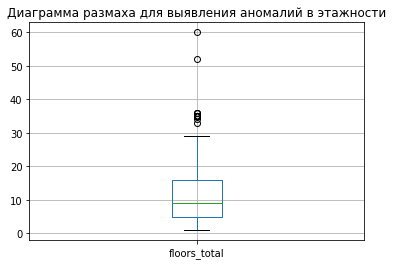

In [17]:
#Прооверяем данные на аномальные значения в других столбцах 
#(так же каждый столбец дополнительно проверялся методом sort_values, чтобы наверняка исключить аномалии)

data['floors_total'].unique() #- аномалий в этажности не выявлено
data.boxplot('floors_total').set_title('Диаграмма размаха для выявления аномалий в этажности');

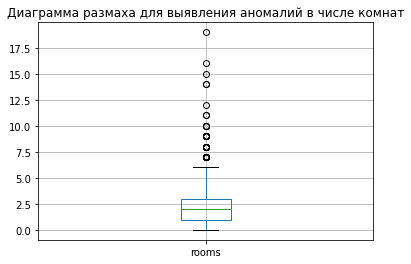

In [18]:
data['rooms'].unique() #-нашли выбивающиеся значения "0" и больше 7 в числе комнат
data.boxplot('rooms').set_title('Диаграмма размаха для выявления аномалий в числе комнат');
#Устраняем выбивающееся значение из столбца с количеством комнат - ноль
data = data.drop(data[data['rooms'] < 1].index)
#Удаляем квартиры, где количество комнат превышает 7
data = data.drop(data[data['rooms'] > 7].index)

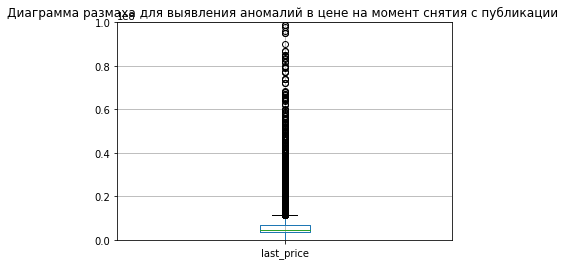

In [19]:
data['last_price'].unique() #- выявлена одна аномалия в цене на момент снятия с публикации - цена в 12 190.0
#cкорее всего, продавец ошибся и не дописал цифру или дейсвительно продавал по данной цене, данную аномалию мы оставим
plt.ylim(-100, 100000000)
data.boxplot('last_price').set_title('Диаграмма размаха для выявления аномалий в цене на момент снятия с публикации ');

13845    250.0
23491    250.0
13931    250.0
20215    249.7
681      249.0
         ...  
1697      28.0
13219     28.0
895       28.0
8605      28.0
1608      20.1
Name: total_area, Length: 22788, dtype: float64

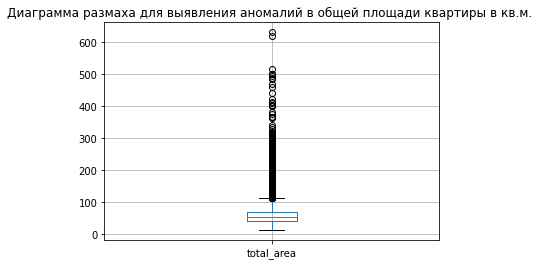

In [20]:
data['total_area'].unique() #- выявлены аномалии в общей площади в квадратных метрах 
data.boxplot('total_area').set_title('Диаграмма размаха для выявления аномалий в общей площади квартиры в кв.м. ');

#Устраняем квартиры, с общей площадью менее 28 кв. м. и не являющимеся апартаментами
data = data.drop(data[(data['total_area'] < 28) & (data['is_apartment'] == False)].index)
#Устраняем квартиры, с общей площадью более 250 кв. м.
data = data.drop(data[(data['total_area'] > 250)].index)

data['total_area'].sort_values(ascending=False)

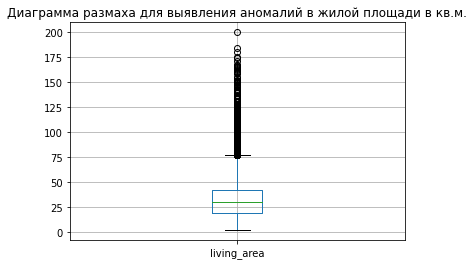

In [21]:
data['living_area'].unique() #- аномалий в жилой площади в квадратных метрах не выявлено
data.boxplot('living_area').set_title('Диаграмма размаха для выявления аномалий в жилой площади в кв.м.');

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22788 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22788 non-null  int64         
 1   last_price            22788 non-null  float64       
 2   total_area            22788 non-null  float64       
 3   first_day_exposition  22788 non-null  datetime64[ns]
 4   rooms                 22788 non-null  int64         
 5   ceiling_height        13902 non-null  float64       
 6   floors_total          22713 non-null  float64       
 7   living_area           20983 non-null  float64       
 8   floor                 22788 non-null  int64         
 9   is_apartment          22788 non-null  bool          
 10  studio                22788 non-null  bool          
 11  open_plan             22788 non-null  bool          
 12  kitchen_area          20909 non-null  float64       
 13  balcony         

#### Особенности в данных:
Нашли выбивающиеся значения в столбце "ceiling_height - высота потолков".
Максимальная высота потолков примерно 3.5 метра. А вот минимальные значения все же прописаны в СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные». В своде правил установлено, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м, а в Сибири, на Дальнем Востоке и на севере Центральной России — не ниже 2,7 м.
То есть необходимо устранить строки, где высота потолков меньше 2.5 м. кв. и больше 3.5 м. кв.
Соответственно, мы устранили квартиры, у которых потолки ниже 2.5 метров и выше 3.5 метров.  
Так же, согласно «СНиП 31-01-2003 Здания жилые многоквартирные» число комнат и площадь квартир для конкретных регионов и городов уточняется органами местного самоуправления с учетом демографических требований, достигнутого уровня обеспеченности населения жилищем и ресурсообеспеченности жилищного строительства. Обычно число комнат в квартирах не превышает 7, поэтому квартиры, с количеством комнат больше 7 мы устранили.
Так же нашли выбивающиеся значения в столбце "living_area - жилая площадь в квадратных метрах (м²)", где указано, что это не аппартаметы, но площадь состоавляет менее 28 кв. м. Согласно нормам, минимальная площадь квартиры дожна составлять: 28 кв. метров. Мы устранили квартиры, где площадь составляла менее 28 кв. м. и не являлась апартаментами.
Нашли выбивающиеся значения в столбце с комнатами - ноль, ноль комнат в жилом поещении просто не может быть, поэтому мы удалили значение ноль из данного столбца.
Выявлена одна аномалия в столбце "цена на момент снятия с публикации" - цена в 12 190.0, cкорее всего, продавец ошибся и не дописал цифру или дейсвительно продавал по данной цене, данную аномалию мы оставили.

In [23]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8886
floors_total               75
living_area              1805
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1879
balcony                     0
locality_name              47
airports_nearest         5298
cityCenters_nearest      5278
parks_around3000            0
parks_nearest           15080
ponds_around3000            0
ponds_nearest           14125
days_exposition          3053
dtype: int64

In [24]:
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,11.00,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,9.10,0,поселок янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,14.40,1,поселок парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,18.90,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,8.81,0,поселок мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


In [25]:
#Устраняем пропущенные значения
#Удаляем строки в столбце с названием населенного пункта с пропущенными значениями 
data.dropna(subset=['locality_name'], inplace=True)

#Заполняем пропущенные значения в столбце этажности дома на основе средней этажности 
data['floors_total'] = data['floors_total'].fillna(data.groupby(['floor'])['floors_total'].transform('mean'))

#Заполняем пропущенные значения в столбце с высотой полотков на основе средней этажности домов
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby(['floors_total'])['ceiling_height'].transform('mean'))
#Оставшиеся пропуски заполняем пробелом 
data['ceiling_height'] = data['ceiling_height'].fillna('')

#Заполняем пропущенные значения в  расстоянии до ближайшего аэропорта в метрах (м) медианным значением местоположения
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby(['locality_name'])['airports_nearest'].transform('median'))
#Оставшиеся пропуски заполняем пробелом 
data['airports_nearest'] = data['airports_nearest'].fillna('')
#Удаляем строки в столбце  расстояние до ближайшего аэропорта в метрах (м) с пропущенными значениями
data.dropna(subset=['airports_nearest'], inplace=True)

#Заполняем пропущенные значения в  расстоянии до центра города (м) медианным значением местоположения
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby(['locality_name'])['cityCenters_nearest'].transform('median'))
#Оставшиеся пропуски заполняем пробелом 
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna('')
#Удаляем строки в столбце  расстояние  расстояние до центра города (м) с пропущенными значениями
data.dropna(subset=['cityCenters_nearest'], inplace=True)

#Считаем пропущенные значения 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1800
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1870
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest           15047
ponds_around3000            0
ponds_nearest           14102
days_exposition          3052
dtype: int64

In [26]:
#Заполняем пропущенные значения в жилой площади медианным значением общей площади квартиры
data['living_area'] = data['living_area'].fillna(data.groupby(['total_area'])['living_area'].transform('median'))

#Заполняем пропущенные значения в площади кухни средним значением жилой площади
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby(['living_area'])['kitchen_area'].transform('mean'))

#Удаляем строки в столбце жилой площади с пропущенными значениями 
data.dropna(subset=['living_area'], inplace=True)

#Удаляем строки в столбце площади кухни с пропущенными значениями 
data.dropna(subset=['kitchen_area'], inplace=True)

#Заполняем пропущенные значения в  расстоянии до ближайшего парка (м) медианным значением местоположения
data['parks_nearest'] = data['parks_nearest'].fillna(data.groupby(['locality_name'])['parks_nearest'].transform('median'))
#Оставшиеся пропуски заполняем пробелом 
data['parks_nearest'] = data['parks_nearest'].fillna('')
#Удаляем строки в столбце  расстояние расстояние до ближайшего парка (м) с пропущенными значениями
data.dropna(subset=['parks_nearest'], inplace=True)

#Заполняем пропущенные значения в  расстоянии до ближайшего водлема (м) медианным значением местоположения
data['ponds_nearest'] = data['ponds_nearest'].fillna(data.groupby(['locality_name'])['ponds_nearest'].transform('median'))
#Оставшиеся пропуски заполняем пробелом 
data['ponds_nearest'] = data['ponds_nearest'].fillna('')
#Удаляем строки в столбце  расстояние расстояние до ближайшего водоёма (м) с пропущенными значениями
data.dropna(subset=['ponds_nearest'], inplace=True)

#Снова считаем пропущенные значения 
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3025
dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22494 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22494 non-null  int64         
 1   last_price            22494 non-null  float64       
 2   total_area            22494 non-null  float64       
 3   first_day_exposition  22494 non-null  datetime64[ns]
 4   rooms                 22494 non-null  int64         
 5   ceiling_height        22454 non-null  float64       
 6   floors_total          22494 non-null  int64         
 7   living_area           22494 non-null  float64       
 8   floor                 22494 non-null  int64         
 9   is_apartment          22494 non-null  bool          
 10  studio                22494 non-null  bool          
 11  open_plan             22494 non-null  bool          
 12  kitchen_area          22494 non-null  float64       
 13  balcony         

In [59]:
data.dropna(subset=['ponds_nearest'], inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17743 entries, 0 to 23693
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17743 non-null  int64         
 1   last_price            17743 non-null  float64       
 2   total_area            17743 non-null  float64       
 3   first_day_exposition  17743 non-null  datetime64[ns]
 4   rooms                 17743 non-null  int64         
 5   ceiling_height        17707 non-null  float64       
 6   floors_total          17743 non-null  int64         
 7   living_area           17743 non-null  float64       
 8   floor                 17743 non-null  int64         
 9   is_apartment          17743 non-null  bool          
 10  studio                17743 non-null  bool          
 11  open_plan             17743 non-null  bool          
 12  kitchen_area          17743 non-null  float64       
 13  balcony         

In [27]:
#В процессе заполения данными - у нас искозились данные: поменялся тип данных, 
#а так же в двух столбцах увеличлись знаки после запятых 

#Меняем тип данных со строки на вещественное число
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'], errors='coerce')
data['airports_nearest'] = pd.to_numeric(data['airports_nearest'], errors='coerce')
data['cityCenters_nearest'] = pd.to_numeric(data['cityCenters_nearest'], errors='coerce')
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'], errors='coerce')
data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest'], errors='coerce')
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors='coerce')
#Меняем тип данных с вещественного числа на целое
data['floors_total'] = data['floors_total'].astype(int)

#Округляем до одного знака после запятой 
data['ceiling_height'] = data['ceiling_height'].round(1)
data['living_area'] = data['living_area'].round(1)
data['kitchen_area'] = data['kitchen_area'].round(1)


#Проверяем изменения
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22494 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22494 non-null  int64         
 1   last_price            22494 non-null  float64       
 2   total_area            22494 non-null  float64       
 3   first_day_exposition  22494 non-null  datetime64[ns]
 4   rooms                 22494 non-null  int64         
 5   ceiling_height        22454 non-null  float64       
 6   floors_total          22494 non-null  int64         
 7   living_area           22494 non-null  float64       
 8   floor                 22494 non-null  int64         
 9   is_apartment          22494 non-null  bool          
 10  studio                22494 non-null  bool          
 11  open_plan             22494 non-null  bool          
 12  kitchen_area          22494 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.7,16,51.0,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.8,11,18.6,1,False,...,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,601.0,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.7,5,34.3,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.6,14,95.0,9,False,...,22.7,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.0,14,32.0,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.6,12,14.4,5,False,...,9.1,0,поселок янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.7,26,10.6,6,False,...,14.4,1,поселок парголово,52996.0,19143.0,0,733.0,0,593.0,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.7,24,44.3,22,False,...,18.9,2,санкт-петербург,23982.0,11634.0,0,460.0,0,506.0,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.7,27,15.4,26,False,...,8.8,0,поселок мурино,51553.0,21888.0,0,NaN,0,133.0,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.5,9,43.6,7,False,...,6.5,2,санкт-петербург,50898.0,15008.0,0,460.0,0,506.0,289.0


#### Вывод:
Мы провели полноценную предобработку данных:
1. Проверили столбцы на наличие дубликатов
2. Проверили столбцы на уникальные значения и аномалии
3. Провели замену типа даных, где это требовалось
4. Привели таблицу в надлежащий вид - округлили значения до одного знака после запятой
5. Устранили явные и неявные дубликаты

   Большинство пропущенных значений приходится на картографический тип данных, возможно, этому поспособствовало то, что приложение недоработано, вследствие чего некорректно находит и отображает местонахождение объектов недвижимости. Остальные пропущенные значения могли появиться из-за некорректного/неправильного предоставления данных пользователем или его нежеланием делиться той или иной информацией.<br>
   Мы провели и изменили тип данных с вещественных чисел на целые числа в столбцах, где указано количество балконов, парков и водоемов, из-за некорректного отображения данных. Так же поменяли на корректный вид дату и время. Все эти изменения помогут нам корректно посчитать или отобразить информацию в дальнейшем. В процессе предобработки данных, некоторые столбцы изменили свой тип данных - мы так же вернули к исходному, правильному типу данных.<br>
   Нашли выбивающиеся значения в столбце "ceiling_height - высота потолков". Максимальная высота потолков примерно 3.5 метра. В своде правил (СП 54.13330.2016 "СНиП 31-01-2003 Здания жилые многоквартирные") установлено, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м, а в Сибири, на Дальнем Востоке и на севере Центральной России — не ниже 2,7 м. Мы устранили квартиры, у которых потолки ниже 2.5 метров и выше 3.5 метров. Устранили квартиры, в которых количество комнат больше 7.<br>
Так же нашли выбивающиеся значения в столбце "living_area - жилая площадь в квадратных метрах (м²)", где указано, что это не аппартаметы, но площадь состоавляет менее 28 кв. м. Согласно нормам, минимальная площадь квартиры дожна составлять: 28 кв. метров. Мы устранили квартиры, где площадь составляла менее 28 кв. м. и не являлась апартаментами.<br>
Нашли выбивающиеся значения в столбце "rooms — число комнат" - ноль, ноль комнат в жилом поещении просто не может быть, поэтому мы удалили значение ноль из данного столбца.<br>
Выявлена одна аномалия в столбце "last_price — цена на момент снятия с публикации" - цена в 12 190.0, cкорее всего, продавец ошибся и не дописал цифру или дейсвительно продавал по данной цене, данную аномалию мы оставили.<br>
Подводя итог, можно сказать, что мы завершили предобработку данных, проведя проверку на дубликаты и аномалии и устранив их. В процессе предобработки из 23 699 строк, у нас осталось 22 495 строки. 

### Посчитайте и добавьте в таблицу новые столбцы

In [28]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.8,11,18.6,1,False,...,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,601.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.7,5,34.3,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,95.0,9,False,...,22.7,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [29]:
#Добавляем новый столбец - цена одного квадратного метра
data['one_meter_price'] = (data['last_price']/data['total_area']).astype(int) 

#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['weekday'] = data['first_day_exposition'].dt.weekday

#месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

#год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

#тип этажа квартиры
def categorize_floors(floor_number):
    if floor_number['floor'] <= 1:
        return 'первый'
    elif floor_number['floor'] == floor_number['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floors_categorize'] = data[['floor', 'floors_total']].apply(categorize_floors, axis=1)
#Проверяем, работает ли функция - все корректно
data['floors_categorize'].value_counts()

#расстояние до центра города в километрах и округляем до целого числа 
data['cityCenters_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_km'] = data['cityCenters_km'].round(0)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price,weekday,month,year,floors_categorize,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,482.0,2,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.8,11,18.6,1,False,...,NaN,0,601.0,81.0,82920,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.7,5,34.3,4,False,...,90.0,2,574.0,558.0,92785,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,95.0,9,False,...,84.0,3,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,8.0


#### Вывод
В результате работы с датафремом, мы добавили новые столбцы: <br>
цена одного квадратного метра; <br>
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);<br>
месяц публикации объявления;<br>
год публикации объявления;<br>
тип этажа квартиры (значения — «первый», «последний», «другой»);<br>
расстояние до центра города в километрах (перевели из м в км и округлили до целых значений).

### Проведите исследовательский анализ данных:

count    22494.000000
mean        58.804004
std         27.299271
min         28.000000
25%         40.500000
50%         52.000000
75%         69.000000
max        250.000000
Name: total_area, dtype: float64


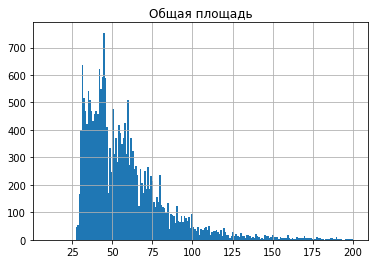

In [30]:
#Выводим список характерных значений, чтобы ознакомиться с данными
print(data['total_area'].describe())

#Строим гистограмму по параметру "общая площадь"
data['total_area'].hist(bins=200, range=(10, 200)).set_title('Общая площадь');

Исходя из данных метода describe() мы наблюдаем, что средний показатель чуть больше медианы, это означает, что в наборе данных есть несколько "выбивающихся" значений, о чем нам говорит показатель страндартного отклонения. 
Изучая гистограмму, мы видим, что пик значений приходится на квартиры, с общей площадью от 35 до 40 кв. 
После площади в 100 кв. м. мы видим спад, что означает, что предложение среди больших квадратур стремится к нулю.
Средняя площадь квартир в объявлениях составляет 59 кв. м.

count    22494.000000
mean        33.616653
std         17.905920
min          2.000000
25%         18.800000
50%         30.000000
75%         42.000000
max        184.000000
Name: living_area, dtype: float64


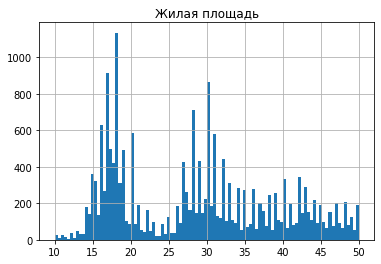

In [31]:
#Выводим список характерных значений, чтобы ознакомиться с данными
print(data['living_area'].describe())

#Строим гистограмму по параметру "жилая площадь"
data['living_area'].hist(bins=100, range=(10, 50)).set_title('Жилая площадь');

Исходя из данных метода describe() мы наблюдаем, что средний показатель чуть больше медианы, это означает, что в наборе данных есть несколько "выбивающихся" значений, о чем нам говорит показатель страндартного отклонения.
Судя по гистограмме, самая популярная жилая площадь в объявлениях составляет 18 кв. м.
Самые нераспространенные - площади до 13 кв. и площади от 23 до 24 кв. м. 
Средняя жилая площадь в объявлениях составляет 33 кв. м.

count    22494.000000
mean        10.407264
std          5.282740
min          1.300000
25%          7.200000
50%          9.100000
75%         11.900000
max        107.000000
Name: kitchen_area, dtype: float64


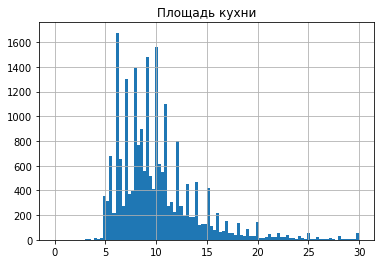

In [32]:
#Выводим список характерных значений, чтобы ознакомиться с данными
print(data['kitchen_area'].describe())

#Строим гистограмму по параметру "площадь кухни"
data['kitchen_area'].hist(bins=100, range=(0, 30)).set_title('Площадь кухни');

Средний показатель чуть больше медианы, однако стандартное отклонение в норме, "выбивающихся" значений практически нет.
Так же на гистограмме можно наблюдать, что популярны кухни с площадью от 6 до 10 кв.м, однако пик приходится на площадь кухни в 6 кв. метров. Самыми непопулярным метражом кухни считаются кухни больше 20 кв. м.
Средняя площадь кухни в объявлениях составляет 10 кв. м.

count        22494.0
mean       6093183.7
std        6586357.2
min          12190.0
25%        3480000.0
50%        4650000.0
75%        6700000.0
max      330000000.0
Name: last_price, dtype: object


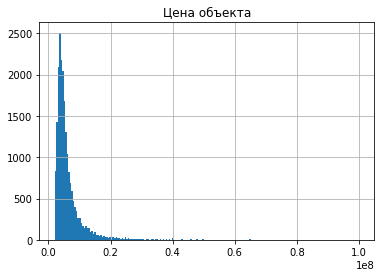

In [33]:
#Выводим список характерных значений и преобразуем экспоненту, чтобы ознакомиться с данными
print(data['last_price'].describe().apply("{:.1f}".format))

#Строим гистограмму по параметру "цена объекта"
data['last_price'].hist(bins=200, range=(2000000, 100000000)).set_title('Цена объекта');

Исходя из данных метода describe() мы наблюдаем, что средний показатель чуть больше медианы, это означает, что в наборе данных есть много "выбивающихся" значений, о чем нам говорит показатель страндартного отклонения, то есть ценовой диапозон на рынке очень разнообразен. 
Средняя цена квартиры составляет примерно от 4 до 6.1 млн. рублей.

count    22494.000000
mean         2.060461
std          0.983702
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


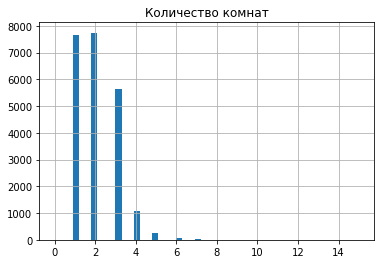

In [34]:
#Выводим список характерных значений, чтобы ознакомиться с данными
print(data['rooms'].describe())

#Строим гистограмму по параметру "количество комнат"
data['rooms'].hist(bins=50, range=(0, 15)).set_title('Количество комнат');

Средний показатель практически равен медиане, стандартное отклонение в норме, "выбивающихся" значений нет. 
Самыми популярными квартирами являются однокомнатные и двухкомнатные квартиры, а так же студии - распространенный вариант для молодых семей/людей, кто начинает самостоятельную жизнь.
Резкий спад идет после четырехкомнатных квартир - спрос на них невелик, поэтому и объявлений о продаже таких квартир стремится к нулю.
В объявлениях о продаже квартир в среднем преобладают двухкомнатные квартиры.

count    22454.000000
mean         2.709931
std          0.182720
min          2.500000
25%          2.600000
50%          2.700000
75%          2.800000
max          3.500000
Name: ceiling_height, dtype: float64


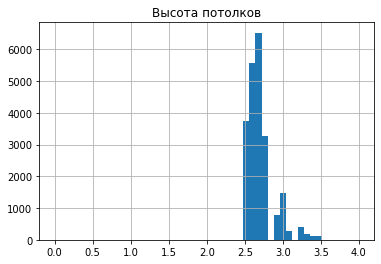

In [35]:
#Выводим список характерных значений, чтобы ознакомиться с данными
print(data['ceiling_height'].describe())

#Строим гистограмму по параметру "высота потолков (м)"
data['ceiling_height'].hist(bins=50, range=(0, 4)).set_title('Высота потолков');

Средний показатель равен медиане, стандартное отклонение в норме, "выбивающихся" значений нет.
Самой популярной высотой потолков в объявлениях является высота в 2.7 м., так же эта высота приходится средней среди всех объявлений.
Редко встретятся потолки с высотой в 3 и больше метров.

count    22494.000000
mean         5.879568
std          4.861340
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


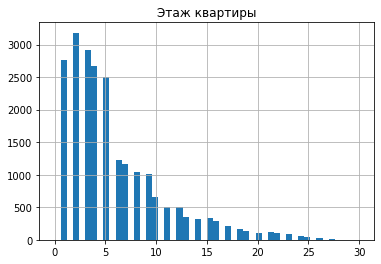

In [36]:
#Выводим список характерных значений, чтобы ознакомиться с данными
print(data['floor'].describe())

#Строим гистограмму по параметру "этаж квартиры"
data['floor'].hist(bins=50, range=(0, 30)).set_title('Этаж квартиры');

Средний показатель практически равен медиане, стандартное отклонение в норме, "выбивающихся" значений нет. 
Самым популярным этажом в объявлениях о продаже квартир является второй этаж, на него приходится пик значений, следом по пиковым значениям идут 1 и 3-4 этажи. После 5 этажа резко идет спад на предложения, то есть основные объявления приходятся на квартиры с этажностью от 1 по 5 этаж, можно предположить, что данные квартиры продается в "пятиэтажках".
После 20 этажа объявлений очень мало и предложение среди высотных квартир стремится к нулю. 

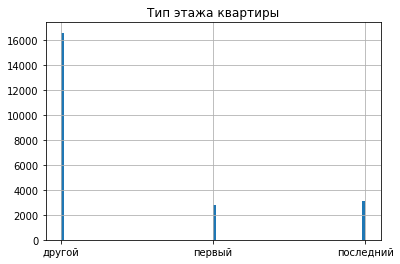

In [37]:
#Строим гистограмму по параметру "тип этажа квартиры («первый», «последний», «другой»)"
data['floors_categorize'].hist(bins=100).set_title('Тип этажа квартиры');

Как видно на гистограмме, меньше всего объявлений о продаже квартир с первым и последним этажом. Это может быть связано с рядом неудобств, которые предполагают первый или последний этаж (первый этаж - окна на равне с жилой улицей, от чего прохожие могут увидеть жителей в окно, сырость от подвального помещения, не проникает достаточного уличного света в сравнении с этажами выше; последний - может протекать крыша, в следствии чего может портиться потолок и ремонт квартиры). 

count    22494.000000
mean        10.663466
std          6.546621
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


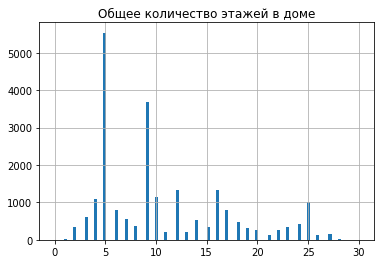

In [38]:
#Выводим список характерных значений, чтобы ознакомиться с данными
print(data['floors_total'].describe())

#Строим гистограмму по параметру "общее количество этажей в доме"
data['floors_total'].hist(bins=100, range=(0, 30)).set_title('Общее количество этажей в доме');

Средний показатель практически равен медиане, стандартное отклонение в норме, "выбивающихся" значений нет.
Самым популярным домом в объявлении является "пятиэтажка", следующие по популярности являются "девятиэтажки", большинство объявлений приходится именно на эти дома. Это можно охарактеризовать тем, что большинство построенных домов в Санкт-Петербурге это пяти и девятиэтажные дома, соответсвенно, предложений на данные дома будет больше.

count    17825.000000
mean     14590.094362
std       8540.860086
min        181.000000
25%       9798.000000
50%      13343.000000
75%      16735.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


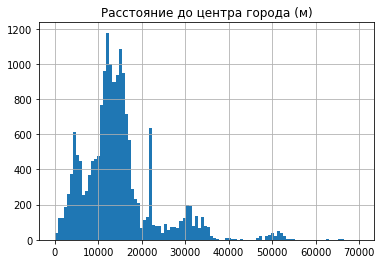

In [39]:
#Выводим список характерных значений, чтобы ознакомиться с данными
print(data['cityCenters_nearest'].describe())

#Строим гистограмму по параметру "расстояние до центра города (м)"
data['cityCenters_nearest'].hist(bins=100, range=(0, 70000)).set_title('Расстояние до центра города (м)');

Мы наблюдаем, что средний показатель чуть больше медианы, это означает, что в наборе данных есть много "выбивающихся" значений, о чем нам говорит показатель страндартного отклонения, то есть расстояния до центра города в предложениях очень разнообразны. 
Пик значений приходится на расстояние от центра в 12 км., большинство объявлений приходится на расстояния от центра города от 11 до 16 км.  
Средняя удаленность от центра в объявлениях составляет 13.3 км. 
Так же можем наблюдать, что предложений, с очень близким расположением к центру гораздно больше, чем предложений, с удаленносью от центра города дальше 38 км. 

count    17825.000000
mean     29517.351865
std      13038.467437
min          0.000000
25%      18692.000000
50%      27428.000000
75%      38786.000000
max      84869.000000
Name: airports_nearest, dtype: float64


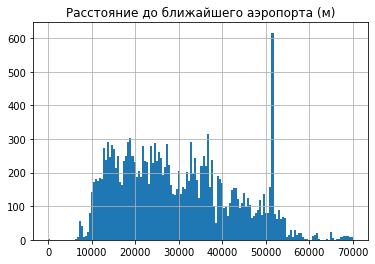

In [40]:
#Выводим список характерных значений, чтобы ознакомиться с данными
print(data['airports_nearest'].describe())

#Строим гистограмму по параметру "расстояние до ближайшего аэропорта в метрах (м)"
data['airports_nearest'].hist(bins=150, range=(0, 70000)).set_title('Расстояние до ближайшего аэропорта (м)');

Мы наблюдаем, что средний показатель чуть больше медианы, это означает, что в наборе данных есть много "выбивающихся" значений, о чем нам говорит показатель страндартного отклонения, то есть расстояния до аэропорта в предложениях очень разнообразны. 
Как мы видим на гистограмме, большинство объявлений приходится на квартиры/аппартаменты с удаленностью от ближайшего аэропорта в 52 км - оптимальный вариат для тех, кто не хочет жить рядом со "взлетной полосой", слушая, как взлетают-приземляются самолеты и одновременно быть не совсем далеко от аэропорта. 
В среднем, в объявлениях квартиры/аппартаменты с удаленностью 27.4 км до ближайшего аэропорта.

count    16808.000000
mean       476.136542
std        235.019947
min          1.000000
25%        423.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64


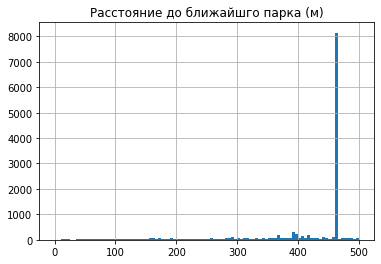

In [41]:
#Выводим список характерных значений, чтобы ознакомиться с данными
print(data['parks_nearest'].describe())

#Строим гистограмму по параметру "расстояние до ближайшего парка (м)"
data['parks_nearest'].hist(bins=100, range=(0, 500)).set_title('Расстояние до ближайшго парка (м)');

Мы наблюдаем, что средний показатель чуть больше медианы, это означает, что в наборе данных есть много "выбивающихся" значений, о чем нам говорит показатель страндартного отклонения, то есть расстояния до парков в объявлениях очень разнообразны. 
Пиковое значение приходится на расстояние в 460 м. до ближайшего парка от дома. 
Средняя удаленность парков в объявлениях равняется 476 м.

count    22494.000000
mean         2.567796
std          1.789233
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

count    22494.000000
mean         6.399218
std          3.490472
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


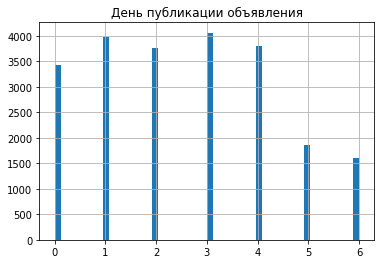

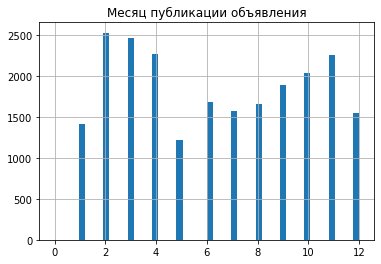

In [42]:
#Выводим список характерных значений, чтобы ознакомиться с данными
print(data['weekday'].describe())
print()
print(data['month'].describe())

#Строим гистограммы по параметру "день и месяц публикации объявления"
#Строим гистограмму по параметру "день публикации объявления"
data['weekday'].hist(bins=50, range=(0, 6)).set_title('День публикации объявления')
plt.show() 
#Строим гистограмму по параметру "месяц публикации объявления"
data['month'].hist(bins=50, range=(0, 12)).set_title('Месяц публикации объявления')
plt.show()

Популярный день недели для публикации объявления приходится на четверг, сразу за ним по популярности идет вторник. Самые "непопулярные" дни недели для публикации объявления приходятся на субботу и воскресенье. Гистограмма нам показывает, что большинство объявлений выкладывают со вторника по четверг.
Что касается месяцев, то самый популярный месяц публикации объявлений является февраль, далее по величине следует март.
Самым непопулярным месяцем для публикаций объявлений является май.

count    19469.000000
mean       180.845858
std        219.085046
min          1.000000
25%         45.000000
50%         96.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


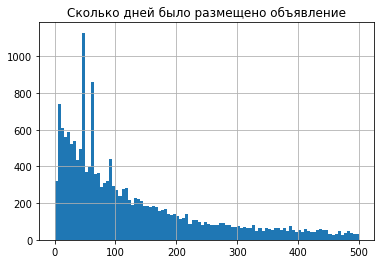

In [43]:
#Выводим список характерных значений - находим среднее и медиану
print(data['days_exposition'].describe())
#Строим гистограмму по параметру "days_exposition — сколько дней было размещено объявление"
data['days_exposition'].hist(bins=100, range=(0, 500)).set_title('Сколько дней было размещено объявление');

Среднее равняется 181 дню.
Медианное значение равняется 96.0 дням.
Так как в датафрейме есть "выбивающееся" значения, которые могут повлиять на среднее число, лучше полагаться на медианное значение, в данном случае оно равно 96 дням, то есть средняя продолжительность объявлений от момента публикации до снятия - 96 дней. Соответственно, можно предположить, что в среднем продажа квартиры/аппартаментов в Санкт-Петербурге занимает полтора (1.5) месяца.
Так же можно наблюдать, что пиковое значение приходится на 50 дней, то есть большинство объявлений "висело" около 50 дней.
Соответсвенно, быстрыми продажами можно назвать те продажи, которые совершались в течении 50 дней.
После 100 дней нахождения объявления тенденция "долгих" объявлений начинает плавно стремиться к нулю.
Редкие значения у нас приходятся на объявления, которые находятся на сайте больше года - данные продажи можно считать необычно долгими. 

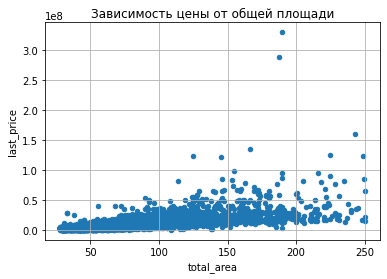

In [44]:
#Строим диаграмму рассеяния для непрерывной переменной - общей площади
data.plot(x='total_area', y='last_price', kind='scatter', grid=True).set_title('Зависимость цены от общей площади');

Смотря на диаграмму, можно сказать, что зависимость между ценой и общей площадью прослеживается - чем больше площадь, тем выше стоимость, так же можно найти уникальные значения с большой площадью и малой стоимостью (то есть можно найти квартиру с хорошим метражом по приемлемой цене). Так же можно заметить, что основная масса точек с наиболее частыми сочетаниями находится у квартир, с квадратурой до 100 кв. м, то есть "больших" квартир на рынке намного меньше, нежели квартир с малым (до 50 кв. м) и средним (до 100 кв.м) метражом.

In [45]:
#Численно оценим взаимсвязь между общей площадью и ценой на квартиру с помощью корреляции
print(data['total_area'].corr(data['last_price']))

0.6659698552307812


Взаимосвязь между данными "зависимость от общей площади"прослеживается:коэффициент корреляции положительный 0.66 и стремиться к единице, это означает, что присутствует линейная связь между величинами и от величины одной - растет величина другой, что как раз мы и наблюдаем на диаграмме.

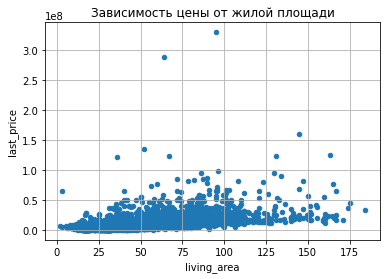

In [46]:
#Строим диаграмму рассеяния для непрерывной переменной - жилой площади
data.plot(x='living_area', y='last_price', kind='scatter', grid=True).set_title('Зависимость цены от жилой площади');

Как показывает диаграмма, наблюдается зависимость цены от жилой площади - чем больше жилая площадь, тем выше цена. Так же можно найти и уникальные значения с маленькой площадью и большой стоимостью.

In [47]:
#Численно оценим взаимсвязь между жилой площадью и ценой на квартиру с помощью корреляции
print(data['living_area'].corr(data['last_price']))

0.5644860671245214


Корреляции зависимости цены от жилой площади в 0.56 говорит о наличии связи, однако не слишком сильной. Выходит, увеличение жилой площади сопровождается увеличением в цене, но так бывает не всегда.

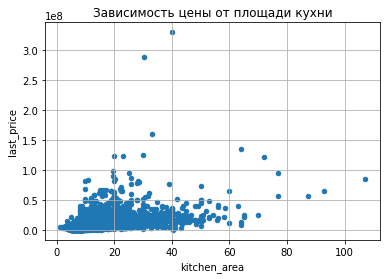

In [48]:
#Строим диаграмму рассеяния для непрерывной переменной - площади кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True).set_title('Зависимость цены от площади кухни');

Как мы видим на диаграмме, зависимость цены от площади кухни есть, у кухонь, площадью до 20 кв. метров прослеживается тенденция повышения цены с повышением метражом кухни, после 20 кв. м. до 60 кв. м. зависимость есть, но небольшая. После 60 кв. м. - аномально большие кухни, наблюдается сильная зависимость цены от большого метража кухни. Так же можно найти и уникальные значения с маленькой площадью и большой стоимостью.

In [49]:
#Численно оценим взаимсвязь между площадью кухни и ценой на квартиру с помощью корреляции
print(data['living_area'].corr(data['last_price']))

0.5644860671245214


Корреляция зависимости цены от площади кухни в 0.56 говорит о наличии связи, однако небольшой. То есть не всегда чем больше размер кухни сопровождается большей ценой.

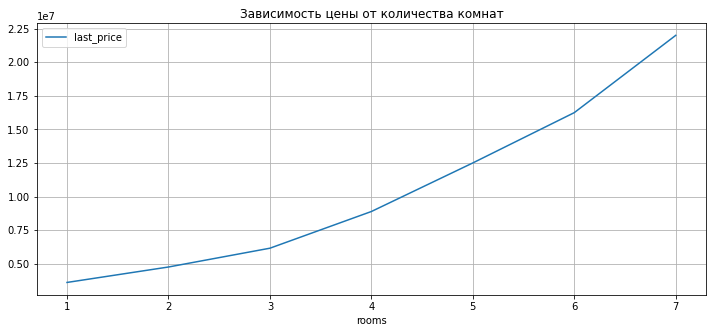

In [50]:
#Строим график зависимости цены от количества комнат
(data.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5)).set_title('Зависимость цены от количества комнат')
);

На графике мы видим зависимость цены от количества комнат, данные имеют однородную тенденцию.

In [51]:
#Численно оценим взаимсвязь между количеством комнат и ценой на квартиру с помощью корреляции
print(data['rooms'].corr(data['last_price']))

0.38310440797066936


Корреляция зависимости цены от количества комнат в 0.38 говорит о слабой связи, то есть не всегда увленичение количества комнат сопроваждается увеличением цены. 

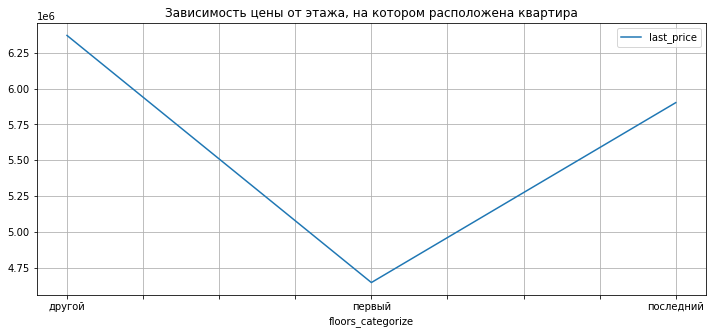

In [52]:
#Строим график зависимости цены от этажа, на котором расположена квартира
(data.pivot_table(index='floors_categorize', values='last_price', aggfunc='mean')
    .plot(grid=True, figsize=(12, 5)).set_title('Зависимость цены от этажа, на котором расположена квартира')
);

Смотря на график можно заметить зависимость цены от этажа, на котором расположена квартира - цены на квартиры с первым этажом меньше всех. Именно тут мы наблюдаем резкий спад. Дальше идут квартиры на последнем этаже - здесь наблюдается цена выше, чем у объявлений  с первым этажом, но она так же меньше, чем все остальные этажи, кроме первого и последнего.
По графику можно сказать, что зависимость прослеживается в полном объеме, квартиры с низкими ценами в большинстве случаев находятся на первом этаже, далее идут квартиры на последнем этаже и т.д. 

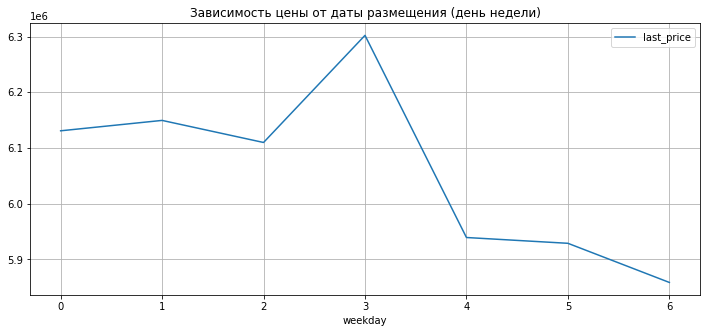

In [53]:
#Строим графики зависимости цены от даты размещения (день недели, месяц, год)

#Строим график зависимости цены от даты размещения (день недели)
(data.pivot_table(index='weekday', values='last_price', aggfunc='mean')
    .plot(grid=True, figsize=(12, 5)).set_title('Зависимость цены от даты размещения (день недели)')
);

Прослеживается зависимость цены от даты размещения (день недели) - самым "дорогим" днем для публикации объявления является четверг, объявления, которые выложили в выходные - имеют самую маленькую цену по сравнению с другими днями недели. 

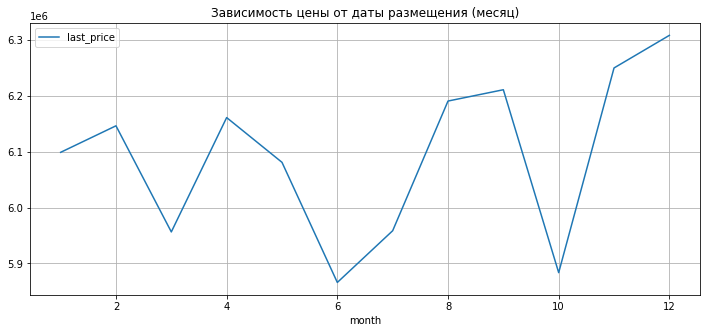

In [54]:
#Строим график зависимости цены от даты размещения (месяц)
(data.pivot_table(index='month', values='last_price', aggfunc='mean')
    .plot(grid=True, figsize=(12, 5)).set_title('Зависимость цены от даты размещения (месяц)')
);

Можем наблюдать зависимость, что в летние и осенние месяцы (особенно в июне и октябре) цены на квартиры значительно меньше, чем во все остальные периоды, однако можно заметить резкое повышение цены перед новогодними праздниками.

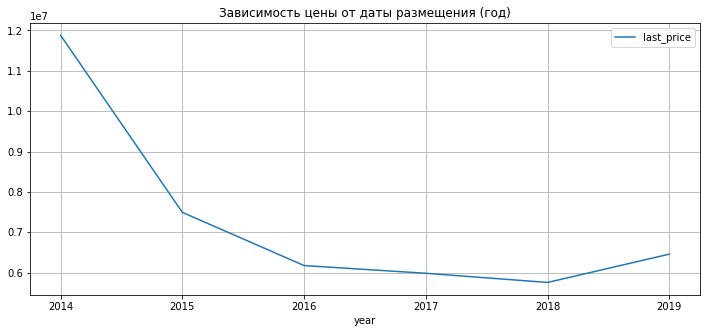

In [55]:
#Строим график зависимости цены от даты размещения (год)
(data.pivot_table(index='year', values='last_price', aggfunc='mean')
    .plot(grid=True, figsize=(12, 5)).set_title('Зависимость цены от даты размещения (год)')
);

Наблюдается падение цены на объявления начиная с 2015 года и продолжает идти вниз вплоть до 2018 года, однако после 2018 года наблюдается положительная тенденция в сторону повышения цен.
Самые высокие цены встречаются в 2014 году.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта:<br>
Согласно корреляции, больше всего на полную стоимость объекта влияет общая площадь объекта недвижимости (корреляция составила 0.66).<br>
Согласно графикам, на полную стоимость больше всего влияет этаж, на котором расположена квартира - квартиры, которые находятся на певром этаже имеют низкие цены по сравнению с другими этажами.<br>
Так же влияет сезонность - в июне и октябре цена на квартиры гораздо меньше, чем во все остальные месяцы, однако цена на квартиры сильно повышается перед нововгодними праздниками.<br>
Объявления, которые выложили в выходные - имеют самую маленькую цену по сравнению с другими днями недели. 

                     count    median
locality_name                       
санкт-петербург    14925.0  104150.0
пушкин               353.0   99987.0
поселок парголово    319.0   92051.0
деревня кудрово      264.0   91030.5
поселок мурино       477.0   83010.0
поселок шушары       429.0   76584.0
колпино              332.0   74689.5
гатчина              305.0   67924.0
всеволожск           382.0   65789.0
выборг               224.0   58001.0


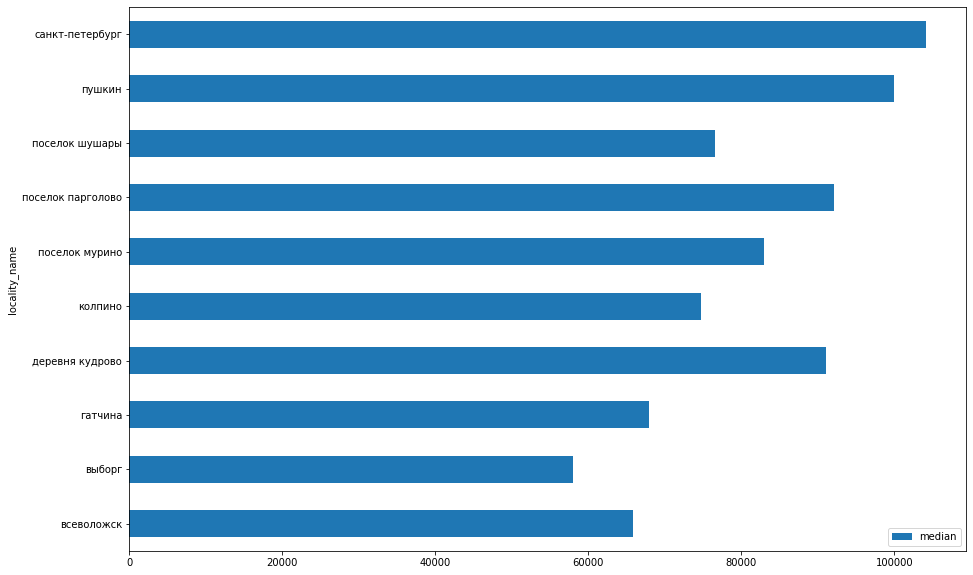

In [56]:
#Считаем и выводим среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
locality_top_10 = data.pivot_table(index='locality_name', values='one_meter_price', aggfunc=({'median','count'}))
#print(locality_top_10.sort_values(by='count', ascending=False).head(11))

#Делаем срез, чтобы в таблице и на гистограмме были только оп 10 населённых пунктов с наибольшим числом объявлений
top_10_stat = locality_top_10.query('count > 200')
print(top_10_stat.sort_values(by='median', ascending=False))
#Строим гистограмму для наглядности 
top_10_stat.plot(kind='barh', y='median', figsize=(15,10));

Мы посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: 
Самое большое число объявлений 14 925, а так же самая высокая цена за квадратный метр 104 150.0 тыс. р. приходится на Санкт-Петербург. Так же высокий ценник за один квадратный метр наблюдается в Пушкин - 99 987.0 тыс. р.
Самым низким показателем в топ-10 населенных пунктов средней цены за квадратный метр является Выборг - 58 001.0 тыс. р., число объявлений среди "десятки" так же самое низкое - 224.0.
Основываясь на таблицу в топ-10 населенных пунктов, можно сказать о том, что популярными и дорогими регионами для продажи квартиры являются Санкт-Петербург и Пушкин, самым невостребованным и дешевым среди десяти - Выборг.

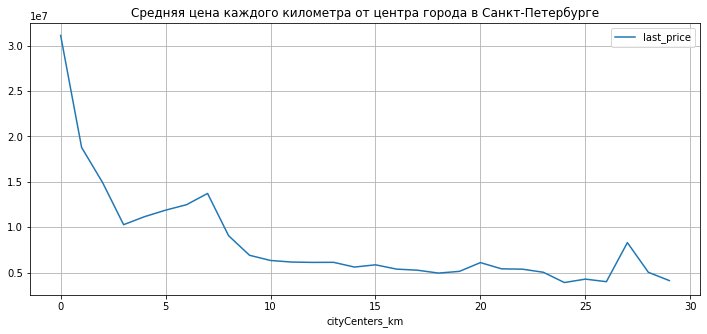

In [57]:
#Делаем срез и выделяем квартиры в Санкт-Петербурге с помощью столбца locality_name
#Вычисляем среднюю цену каждого километра от центра города и строим график
(data.query('locality_name == "санкт-петербург"')
.pivot_table(index='cityCenters_km', values='last_price')
.plot(grid=True, figsize=(12,5)).set_title('Средняя цена каждого километра от центра города в Санкт-Петербурге')
);

Мы сделали срез, выделили квартиры в Санкт-Петербурге с помощью столбца locality_name, вычислили среднюю цену каждого километра и построили график:
С помощью графика мы можем наблюдать, что зависимость между ценой и удаленности от центра города прослеживается - чем дальше расположен объект недвижимости от центра города, тем дешевле. Можно наблюдать, что цены в объявлениях, начиная с удаленность от центра в 10 км. и заканчивая 23 км. - практически одинаковы. Самый пик цен приходится на квартиры/аппартаменты с удаленностью от центра до 2 км.

#### Вывод
Мы провели полноценную исследовательскую работу:
1. Мы построили отдельные гистограммы для каждого из этих параметров и описали все наблюдения по параметрам в ячейках с типом markdown
2. Изучили, как быстро продавались квартиры 
3. Описали, сколько времени обычно занимает продажа, а так же
4. Исследовали, какие продажи можно считать быстрыми, а какие — необычно долгими
5. Построили графики, которые показывали зависимость цены от таких параметров как: <br>
общая площадь; жилая площадь; площадь кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год)<br>
6. Изучили и описали какие факторы больше всего влияют на общую (полную) стоимость объекта
7. Мы посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
8. Мы сделали срез, выделили квартиры в Санкт-Петербурге с помощью столбца locality_name, вычислили среднюю цену каждого километра и построили график.

### Общий вывод

1.	Мы ознакомились с датафреймом и изучили его;
2.	Мы провели полноценную предобработку данных:
Большинство пропущенных значений приходится на картографический тип данных.<br>

Мы провели и изменили тип данных с вещественных чисел на целые числа в столбцах, где указано количество балконов, парков и водоемов, из-за некорректного отображения данных. Так же поменяли на корректный вид дату и время. В процессе предобработки данных, некоторые столбцы изменили свой тип данных - мы так же вернули к исходному, правильному типу данных.<br>
Нашли выбивающиеся значения в столбце "ceiling_height - высота потолков" и  устранили квартиры, у которых потолки ниже 2.5 метров и выше 3.5 метров, а так же квартиры, в которых количество комнат больше 7.  Устранили квартиры, где площадь составляла менее 28 кв. м. и не являлась апартаментами.<br>
В процессе предобработки из 23 699 строк, у нас осталось 22 495 строки.  .<br>

3.	В результате работы с датафремом, мы добавили новые столбцы;
4.	Провели полноценный исследовательский анализ данных: <br>

Пик значений приходится на квартиры, с общей площадью от 35 до 40 кв. После площади в 100 кв. м. мы видим спад, что означает, что предложение среди больших квадратур стремится к нулю. Средняя площадь квартир в объявлениях составляет 59 кв. м.<br>
Самая популярная жилая площадь в объявлениях составляет 18 кв. м. Самые нераспространенные - площади до 13 кв. и площади от 23 до 24 кв. м. Средняя жилая площадь в объявлениях составляет 33 кв. м.<br>
Популярны кухни с площадью от 6 до 10 кв.м, однако пик приходится на площадь кухни в 6 кв. метров. Самыми непопулярным метражом кухни считаются кухни больше 20 кв. м. Средняя площадь кухни в объявлениях составляет 10 кв. м.<br>
Средняя цена квартиры в объявлениях составляет примерно от 4 до 6.1 млн. рублей. <br>
Самыми популярными квартирами являются однокомнатные и двухкомнатные квартиры, а так же студии - распространенный вариант для молодых семей/людей, кто начинает самостоятельную жизнь. В объявлениях о продаже квартир в среднем преобладают двухкомнатные квартиры.   <br>
Самой популярной высотой потолков в объявлениях является высота в 2.7 м., так же эта высота приходится средней среди всех объявлений. Редко встретятся потолки с высотой в 3 и больше метров. <br>
Самым популярным этажом в объявлениях о продаже квартир является второй этаж, на него приходится пик значений, следом по пиковым значениям идут 1 и 3-4 этажи. После 5 этажа резко идет спад на предложения, то есть основные объявления приходятся на квартиры с этажностью от 1 по 5 этаж, можно предположить, что данные квартиры продается в "пятиэтажках". <br>
Самым популярным домом в объявлении является "пятиэтажка", следующие по популярности являются "девятиэтажки", большинство объявлений приходится именно на эти дома. <br>
Меньше всего объявлений о продаже квартир с первым и последним этажом. <br>
Большинство объявлений приходится на расстояния от центра города от 11 до 16 км. Средняя удаленность от центра в объявлениях составляет 13.3 км. <br>
Большинство объявлений приходится на квартиры/аппартаменты с удаленностью от ближайшего аэропорта в 52 км.  В среднем, в объявлениях квартиры/аппартаменты с удаленностью 27.4 км до ближайшего аэропорта. <br>
Пиковое значение приходится на расстояние в 460 м. до ближайшего парка от дома. Средняя удаленность парков в объявлениях равняется 476 м. <br>
Популярный день недели для публикации объявления приходится на четверг, сразу за ним по популярности идет вторник. Самые "непопулярные" дни недели для публикации объявления приходятся на субботу и воскресенье. Большинство объявлений выкладывают со вторника по четверг. Что касается месяцев, то самый популярный месяц публикации - февраль, далее по величине следует март. Самым непопулярным является май месяц. <br>
В среднем продажа квартиры/аппартаментов в Санкт-Петербурге занимает полтора (1.5) месяца. Так же можно наблюдать, что пиковое значение приходится на 50 дней. Соответственно, быстрыми продажами можно назвать те продажи, которые совершались в течении 50 дней. Необычно долгими продажами можно считать объявления, которые находятся на сайте больше года. <br>

Зависимость между ценой и общей площадью прослеживается - чем больше площадь, тем выше стоимость. Коэффициент корреляции положительный 0.66 и стремиться к единице, это означает, что присутствует линейная связь между величинами. <br>
Наблюдается зависимость цены от жилой площади - чем больше жилая площадь, тем выше цена. Корреляции зависимости цены от жилой площади в 0.56 говорит о наличии связи, однако не слишком сильной. <br>
Зависимость цены от площади кухни есть, у кухонь, площадью до 20 кв. метров прослеживается тенденция повышения цены с повышением метражом кухни, после 20 кв. м. до 60 кв. м. зависимость есть, но небольшая. Корреляция зависимости цены от площади кухни в 0.56 говорит о наличии связи, однако небольшой. <br>
Данные зависимости цены от количества комнат имеют однородную тенденцию. Корреляция зависимости цены от количества комнат в 0.38 говорит о слабой связи. <br>
Зависимость цены от этажа прослеживается в полном объеме, квартиры с низкими ценами в большинстве случаев находятся на первом этаже, далее идут квартиры на последнем этаже и т.д. <br>
Прослеживается зависимость цены от даты размещения (день недели) - самым "дорогим" днем для публикации объявления является четверг, объявления, которые выложили в выходные - имеют самую маленькую цену по сравнению с другими днями недели. <br>
Можем наблюдать, что в летние и осенние месяцы (особенно в июне и октябре) цены на квартиры значительно меньше, чем во все остальные периоды, однако можно заметить резкое повышение цены перед новогодними праздниками. <br>
 С 2015 года наблюдается падение цены и продолжает идти вниз вплоть до 2018 года, однако после 2018 года наблюдается положительная тенденция в сторону повышения цен. Самые высокие цены встречаются в 2014 году. <br>
Согласно корреляции, больше всего на полную стоимость объекта влияет общая площадь объекта недвижимости (корреляция составила 0.66).
Согласно графикам, на полную стоимость больше всего влияет этаж, на котором расположена квартира - квартиры, которые находятся на певром этаже имеют низкие цены по сравнению с другими этажами.
Так же влияет сезонность - в июне и октябре цена на квартиры гораздо меньше, чем во все остальные месяцы, однако цена на квартиры сильно повышается перед нововгодними праздниками. 
Объявления, которые выложили в выходные - имеют самую маленькую цену по сравнению с другими днями недели. <br>

Самое большое число объявлений 14 925, а так же самая высокая цена за квадратный метр 104 150.0 тыс. р. приходится на Санкт-Петербург. Так же высокий ценник за один квадратный метр наблюдается в Пушкин - 99 987.0 тыс. р. Самым низким показателем в топ-10 населенных пунктов средней цены за квадратный метр является Выборг - 58 001.0 тыс. р., число объявлений среди "десятки" так же самое низкое - 224.0. <br>
Зависимость между ценой и удаленности от центра города прослеживается - чем дальше расположен объект недвижимости от центра города, тем дешевле. Можно наблюдать, что цены в объявлениях, начиная с удаленность от центра в 10 км. и заканчивая 23 км. - практически одинаковы. Самый пик цен приходится на квартиры/аппартаменты с удаленностью от центра до 2 км. <br>


Рекомендации по объявлениям и покупке квартиры: <br>
1.	Продавцам необходимо перевыложить или изменить объявление, если оно висит на сайте, с момента публикации больше 1.5 месяцев, чтобы повысить шансы продажи квартиры, так как большинство объявлений находятся на сайте в среднем 1.5 месяца;
2.	Самые выгодные месяцы для покупки жилья являются летние и осенние месяцы (особенно июнь и октябрь), так как в этот период времени цены на квартиры значительно меньше, чем во все остальные периоды, однако необходимо быть внимательными, так как самые высокие цены наблюдаются перед Новым годом;
3.	Так же покупателям недвижимости можно посоветовать присмотреться к вартирам на первом и последних этажах, так как именно у данных этажей прослеживается низкая стоимость, в сравнении с "другими" этажами.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод